This is the project of Udacity's data science nanodegree program. This project is required to analyse data with CRISP-DM.
CRISP-DM (Cross-Industry Standard Process for Data Mining) Business Understanding Data Understanding Data Preparation Modeling Evaluation Deployment

Section 1 : Business Understanding

Airbnb is a online platform for lodging, which profits by receiving commission from each booking. We will review the data of Airbnb in Boston to learn more about the type of rooms and properties, the price and the correlation between price and reviews

Key Questions:
1. Types of properties and room types
2. The implication of different months on the room availaility and average price
3. The correlation between price and reviews

In [2]:
# Load all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import matplotlib as mtick

# Import the datasets
listings_df = pd.read_csv("D:/Duyn's World/Learning/Python/Udacity_Write_Data_Science_Post/data/listings.csv")
calendar_df = pd.read_csv("D:/Duyn's World/Learning/Python/Udacity_Write_Data_Science_Post/data/calendar.csv")
reviews_df = pd.read_csv("D:/Duyn's World/Learning/Python/Udacity_Write_Data_Science_Post/data/reviews.csv")

Section 2: Data Understanding

In [3]:
# shape of the data sets
print('Dataframe shapes:\nListings - {0} \nCalendar - {1} \nReviews  - {2}'.format(listings_df.shape, calendar_df.shape, reviews_df.shape ))
print('\nnumber of rows\nListings - {0:9,} \nCalendar - {1:9,} \nReviews  - {2:9,}'.format(listings_df.shape[0], calendar_df.shape[0], reviews_df.shape[0]))

Dataframe shapes:
Listings - (3585, 95) 
Calendar - (1308890, 4) 
Reviews  - (68275, 6)

number of rows
Listings -     3,585 
Calendar - 1,308,890 
Reviews  -    68,275


In [4]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [6]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [7]:
listings_df.info()
print('--The percentage of missing values in each column--')
listings_df.isnull().mean() * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

id                                   0.000000
listing_url                          0.000000
scrape_id                            0.000000
last_scraped                         0.000000
name                                 0.000000
                                      ...    
cancellation_policy                  0.000000
require_guest_profile_picture        0.000000
require_guest_phone_verification     0.000000
calculated_host_listings_count       0.000000
reviews_per_month                   21.087866
Length: 95, dtype: float64

In [8]:
calendar_df.info()
print('--The percentage of missing values in each column--')
calendar_df.isnull().mean() * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
--The percentage of missing values in each column--


listing_id     0.000000
date           0.000000
available      0.000000
price         50.871578
dtype: float64

In [9]:
reviews_df.info()
print('--The percentage of missing values in each column--')
reviews_df.isnull().mean() * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB
--The percentage of missing values in each column--


listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.077627
dtype: float64

Section 3: Data Preparation

In [10]:
#Due to the 51% data is missing in the 'price' column of 'calendar.csv', so I decided to remove them out of the table
calendar_df = calendar_df.dropna(subset=['price'])
#calendar_df = calendar_df.rename(columns={'id': 'listing_id'})
# Remove commas in price
calendar_df['price'] = calendar_df['price'].apply(lambda x:''.join(x.split(',')))
# Convert price to numeric data
calendar_df['price'] = calendar_df['price'].apply(lambda x:float(x.split('$')[1]))
calendar_df.sample(4)

,listing_id,date,available,price
912313,5406448,2016-12-31,t,250.0
88017,6644330,2017-07-15,t,120.0
1032957,1472481,2017-06-15,t,60.0
980477,7513906,2017-02-19,t,137.0


In [11]:
# Convert available to numeric data
calendar_df['available'] = calendar_df['available'].apply(lambda x:1 if x=='t' else 0)
# Split month into a separate column
calendar_df['month'] = calendar_df['date'].apply(lambda x: x.split('-')[1])
calendar_df.sample(4)

# check if the number of listings was the same every day
calendar_df.groupby(['listing_id']).count()['date'].unique()
calendar_df 

,listing_id,date,available,price,month
365,3075044,2017-08-22,1,65.0,08
366,3075044,2017-08-21,1,65.0,08
367,3075044,2017-08-20,1,65.0,08
368,3075044,2017-08-19,1,75.0,08
369,3075044,2017-08-18,1,75.0,08
...,...,...,...,...,...
1308875,14504422,2016-09-20,1,62.0,09
1308876,14504422,2016-09-19,1,62.0,09
1308877,14504422,2016-09-18,1,62.0,09
1308878,14504422,2016-09-17,1,62.0,09


In [12]:
# Groupby by month sum
calendar_df_month_sum = calendar_df.groupby(['month']).sum()
calendar_df_month_sum.drop(['listing_id'],axis=1,inplace=True)
calendar_df_month_sum.reset_index(inplace=True)
calendar_df_month_sum

,month,available,price
0,01,63181,11549466.0
1,02,56810,10280396.0
2,03,55181,10032940.0
3,04,51382,10135248.0
4,05,53600,10382979.0
5,06,52731,10363503.0
6,07,54963,11129255.0
7,08,55561,11297226.0
8,09,33398,7916920.0
9,10,46345,10817676.0


In [35]:
Stat = listings_df[["host_response_rate", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "zipcode", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]

# Remove commas in price
Stat['price'] = Stat['price'].apply(lambda x:''.join(x.split(',')))
# Convert price to numeric data
Stat['price'] = Stat['price'].apply(lambda x:float(x.split('$')[1]))
Stat.sample(4)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13044\4044718192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stat['price'] = Stat['price'].apply(lambda x:''.join(x.split(',')))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13044\4044718192.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stat['price'] = Stat['price'].apply(lambda x:float(x.split('$')[1]))


,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
2458,100%,100%,f,2,02115,Apartment,Private room,2,1.0,1.0,1.0,63.0,2,100.0,strict,2.00
1861,99%,81%,f,30,02114,Apartment,Entire home/apt,8,2.0,2.0,3.0,267.0,8,78.0,strict,4.29
2146,71%,98%,f,363,02109,Apartment,Entire home/apt,4,2.0,2.0,2.0,249.0,0,NaN,strict,NaN
752,100%,88%,f,1,02113,Apartment,Entire home/apt,2,1.0,1.0,1.0,275.0,18,93.0,strict,1.49


In [36]:
# drop NaN rows
Stat2=Stat.dropna(axis=0)
# select non-numeric variables and create dummies
non_num_vars = Stat2.select_dtypes(include=['object']).columns
Stat2[non_num_vars].head()

,host_response_rate,host_acceptance_rate,host_is_superhost,zipcode,property_type,room_type,cancellation_policy
1,100%,100%,f,02131,Apartment,Private room,moderate
2,100%,88%,t,02131,Apartment,Private room,moderate
4,100%,100%,t,02131,House,Private room,flexible
5,100%,95%,t,02131,Condominium,Private room,flexible
6,98%,96%,f,02131,Apartment,Entire home/apt,strict


In [37]:
dummy_vars = pd.get_dummies(Stat2[non_num_vars])
dummy_vars.head()

# drop non-numeric variables from Stat2 and add the dummies
Stat3=Stat2.drop(non_num_vars,axis=1)
Stat3 = pd.merge(Stat3,dummy_vars, left_index=True, right_index=True)
Stat3.head()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,reviews_per_month,host_response_rate_0%,...,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
1,1,2,1.0,1.0,1.0,65.0,36,94.0,1.30,0,...,0,0,0,0,1,0,0,1,0,0
2,1,2,1.0,1.0,1.0,65.0,41,98.0,0.47,0,...,0,0,0,0,1,0,0,1,0,0
4,1,2,1.5,1.0,2.0,79.0,29,99.0,2.25,0,...,0,0,0,0,1,0,1,0,0,0
5,2,2,1.0,1.0,1.0,75.0,8,100.0,1.70,0,...,0,0,0,0,1,0,1,0,0,0
6,5,3,1.0,1.0,2.0,100.0,57,90.0,4.00,0,...,0,0,0,1,0,0,0,0,1,0


Section 4: Modeling & Evaluation

,0,1,2,3,4,5,6,7,8,9,10,11,12
property_type,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa
count,2612,41,12,1,231,2,4,1,562,39,17,54,6
percent,72.92,1.14,0.34,0.03,6.45,0.06,0.11,0.03,15.69,1.09,0.47,1.51,0.17


,0,1,2
room_type,Entire home/apt,Private room,Shared room
count,2127,1378,80
percent,59.33,38.44,2.23


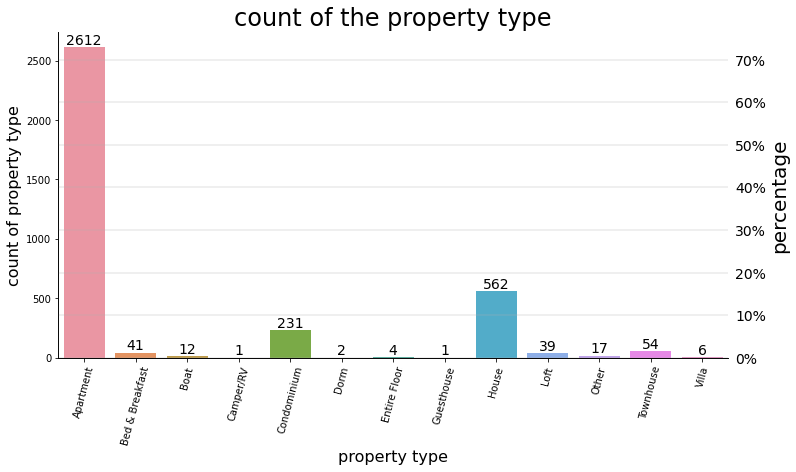

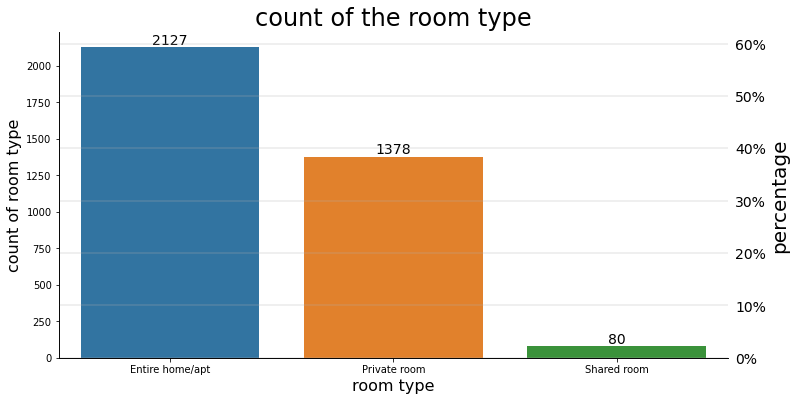

In [13]:
def propertyTypes(df=listings_df, byType='property_type'):
    '''
    To show the ratio between property types and room types
        data.groupby(byType)['id'].count().reset_index(): count each property and room type first
        (data['id']/total * 100).round(2): then divide them by the total number to archieve the percentage of each type
    import seaborn as sns: provide a high-level interface for drawing attractive and informative statistical graphics.
    '''

    if (byType == 'property_type'):
        rotation = 75
    else:
        rotation = 0
    
    data = listings_df 
    data = data.groupby(byType)['id'].count().reset_index()
    total = data['id'].sum()
    data['percent'] = (data['id']/total * 100).round(2)

    plt.figure(figsize=(12,6))
    
    ax = sns.barplot(x=byType, y='id', data=data)
    
    
    byTypeText = byType.replace("_"," ")
    plt.xticks(rotation=rotation)
    plt.title('count of the ' + byTypeText, fontsize=24)
    ax.set_xlabel(byTypeText, fontsize=16)
    ax.set_ylabel('count of ' + byTypeText, fontsize=16)
    
    #ax.grid(axis='y', linewidth=.4)
    for container in ax.containers:
        ax.bar_label(container, fontsize=14) #, fmt='%.2f')
        
    ax2=ax.twinx()
    
    ax = sns.barplot(x=byType, y='percent', data=data)
    
    ax.set_ylabel('percentage', fontsize=20)
    ax.grid(which='both', axis='y', linewidth=0.4)
    ax.yaxis.set_major_formatter(mtick.ticker.PercentFormatter())
    

    #ax.figure.legend()
    plt.yticks(fontsize=14)
    ax.tick_params(right=False)
    sns.despine()
    
    display(data.rename(columns={'id':'count'}).T)

propertyTypes(listings_df, 'property_type')
propertyTypes(listings_df, 'room_type')

Question 1: There are 13 property types in Boston that AirBNB associate with, where the customer prefer Apartments (73%) than the second House (17%) and the third Condominium (6%).

The customers book entire home/apt (59%) more than private room (38%) or shared room (2%), which bring more confortable space for them.

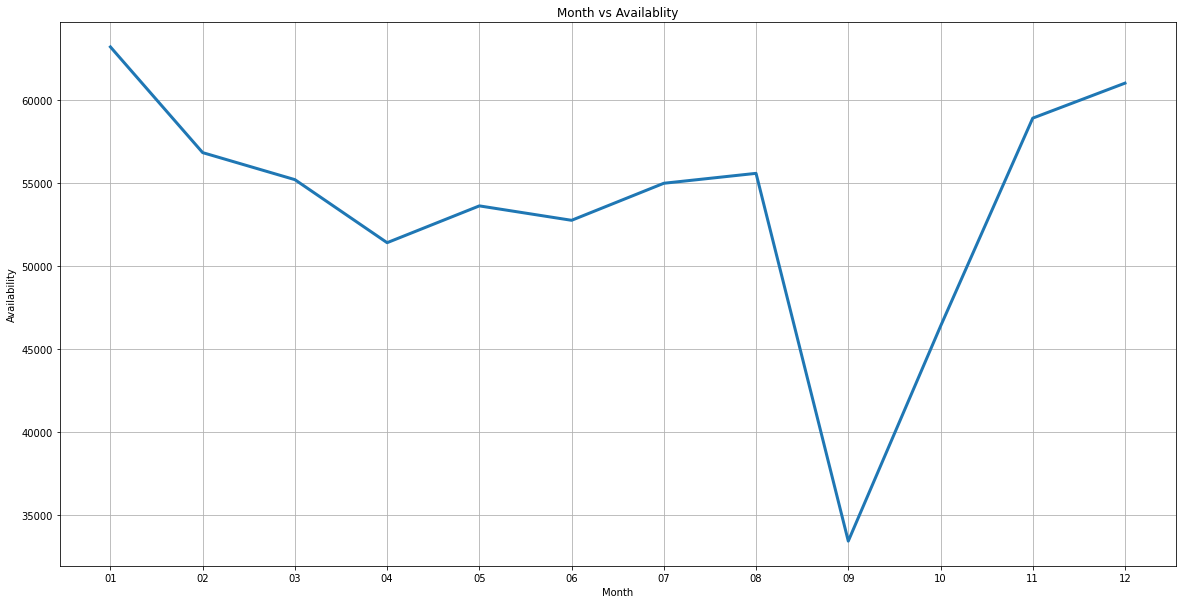

In [14]:
'''
In order to show the relationship between availability and month, we need to group them by month first
calendar_df_month_sum: calculate the sum of avaibility which is in a same month
'''

#Group by month sum
calendar_df_month_sum = calendar_df.groupby(['month']).sum()
calendar_df_month_sum.drop(['listing_id'],axis=1,inplace=True)
calendar_df_month_sum.reset_index(inplace=True)

#Plot the availability by month
plt.figure(figsize=(20, 10))
x = calendar_df_month_sum['month']
y = calendar_df_month_sum['available']
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Month')
plt.ylabel('Availability')
plt.title('Month vs Availablity')
plt.grid(True)
plt.show()

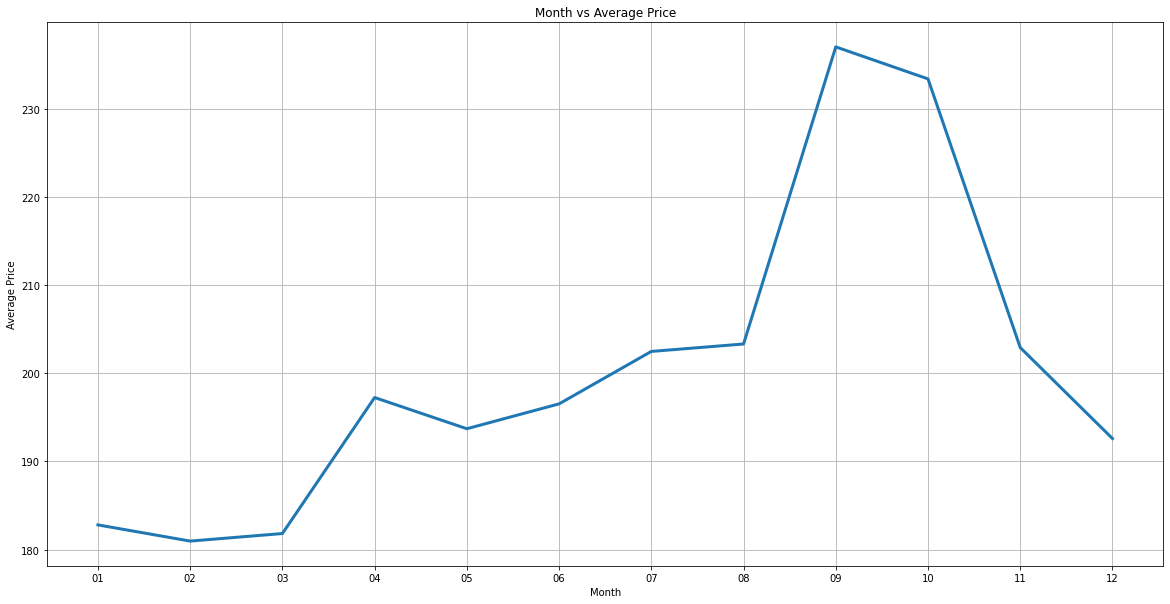

In [16]:
'''
In order to show the relationship between price and month, we also need to group them by month first
calendar_df_month_sum['average price']: divide the total price in 1 month by the total number of availability
'''
# Groupby by month average
calendar_df_month_sum['average price'] = calendar_df_month_sum['price']/calendar_df_month_sum['available']

plt.figure(figsize=(20, 10))
x = calendar_df_month_sum['month']
y = calendar_df_month_sum['average price']
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Month vs Average Price')
plt.grid(True)
plt.show()

Question 2: In general, the chart of availability is opposite of the chart of average price. The price gradually increase from Jan to reach the peak in Sep, meanwhile, the availability seems to be decrease from Jan to the bottom in Sep. We can see the price reflects the acsending of the demand in the Sep and Oct then drops afterwards, the reason maybe is Labor and Columbus Day. 

Text(0.5, 1.0, 'No. of reviews vs price')

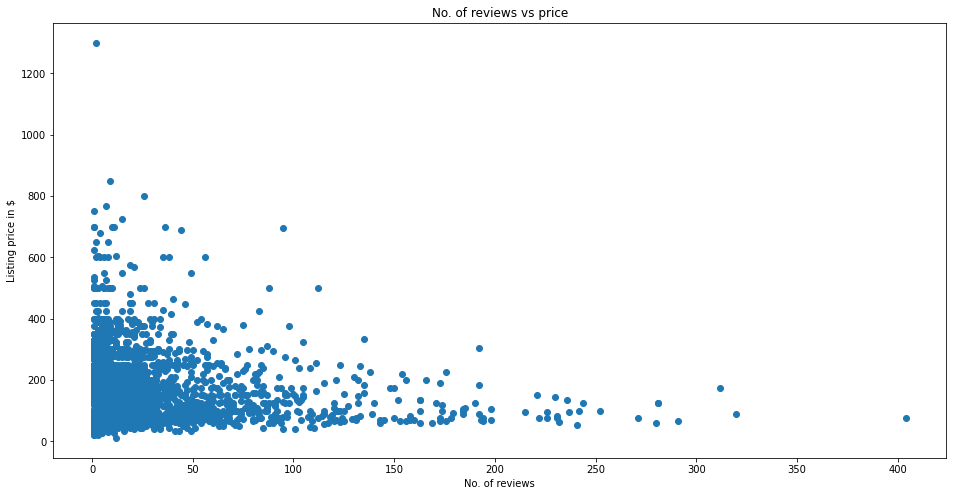

In [38]:
'''
The relationship of price and reviews should be shown in scatter plot
where the x axis is No of reviews
and the y axis is Listing price in $
'''
#Plot scatter plot of Number of reviews vs price
plt.figure(figsize=(16,8))
plt.scatter(Stat3['number_of_reviews'],Stat3['price'])
plt.ylabel('Listing price in $')
plt.xlabel('No. of reviews')
plt.title('No. of reviews vs price')

Question 3: The price is inversely propotional to the number of reviews. The main number of reviews are applied on below $200 which is low-middle range. It means the low-middle price properties attract more customers than the high price ones.